In [1]:
# TO DO
# Incorporate CAGR and any other bits from tutorial (inc. rolling averages)
# Understadn why annualised return rising with lower granuality
# Use volume to determine optimal trading hours
# logistic regression on rolling averages and lagged variables
# buy sell based on signal strengt



import sys
import os
from sklearn.linear_model import LogisticRegression

In [2]:
# enable imports from src folder
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [3]:
from _01_data.DataIngestor import DataIngestor
from _01_data.DataExplorer import DataExplorer


In [4]:
config_path = '../configurations/config.json'

In [5]:
ticker = "MSFT"
start = "2022-05-01"
end = "2024-02-26"
interval = "1h"
agg_method = {
            'price': 'last',  # Use the last price in the period
            'volume': 'sum'   # Sum up the volumes in the period
             }

In [6]:
di = DataIngestor(ticker, start=start, end=end, interval=interval)


In [7]:
di.apply_config(config_path)

In [8]:
de = DataExplorer(di.data, ticker)

In [9]:
de.add_log_diff_column("price")

mean: 0.00011909308548426755 | std: 0.0068818104376277695
skew: -0.021760026161250976 | kurtosis: 16.39849656956303
annualised mean: 0.19507447402323025 | std: 0.0048199606855914385


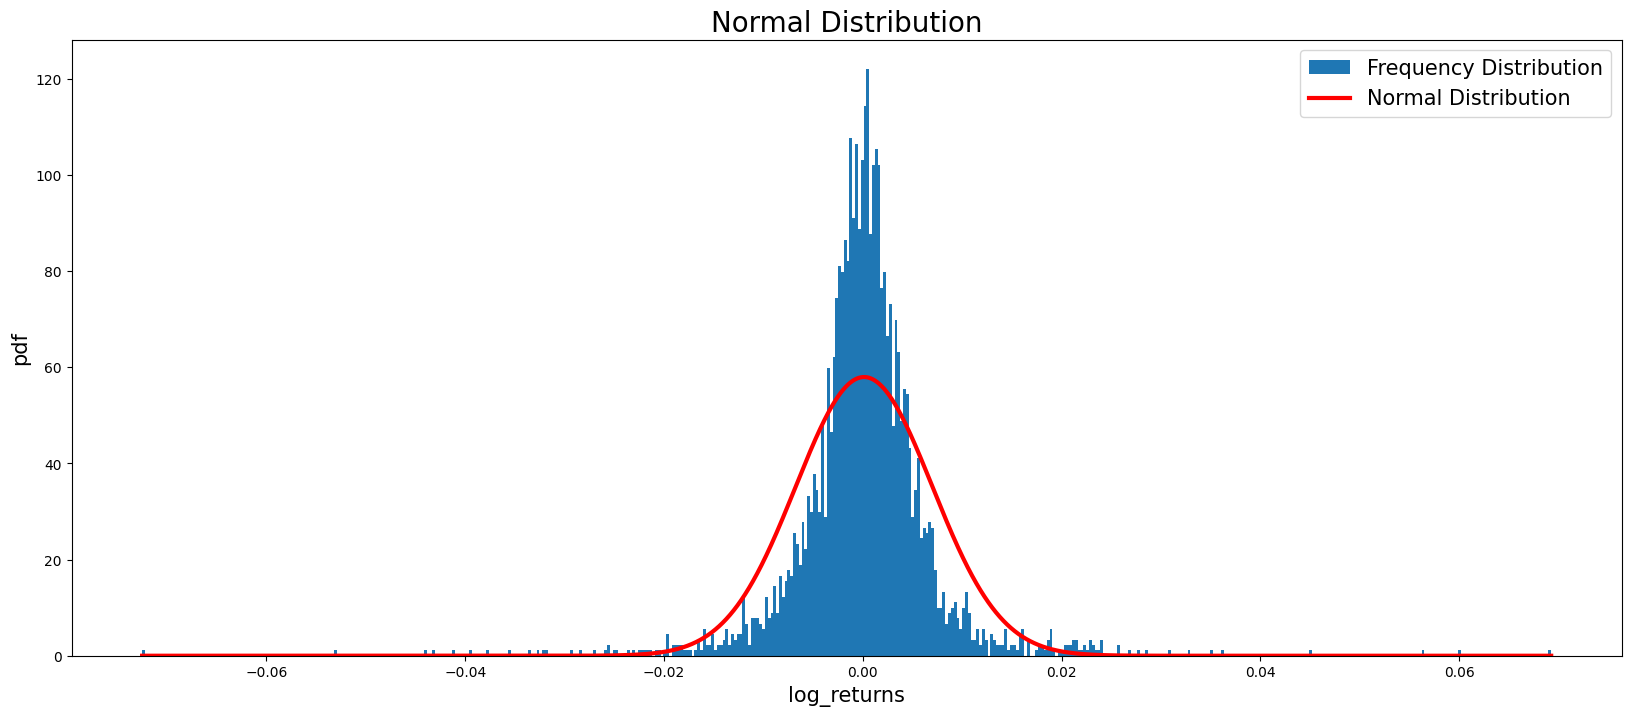

In [10]:
de.distribution_stats("log_returns")
de.annualised_perf("log_returns", 1638)
de.plot_histogram("log_returns")

In [11]:
de.data.to_csv("hourly_data.csv")

In [12]:
de.resample("D", agg_method)
de.add_log_diff_column("price")

mean: 0.0008040717666578767 | std: 0.018299031712850137
skew: 0.030757308160333896 | kurtosis: 2.048835709280646
annualised mean: 0.2026260851977849 | std: 0.012764243584950593


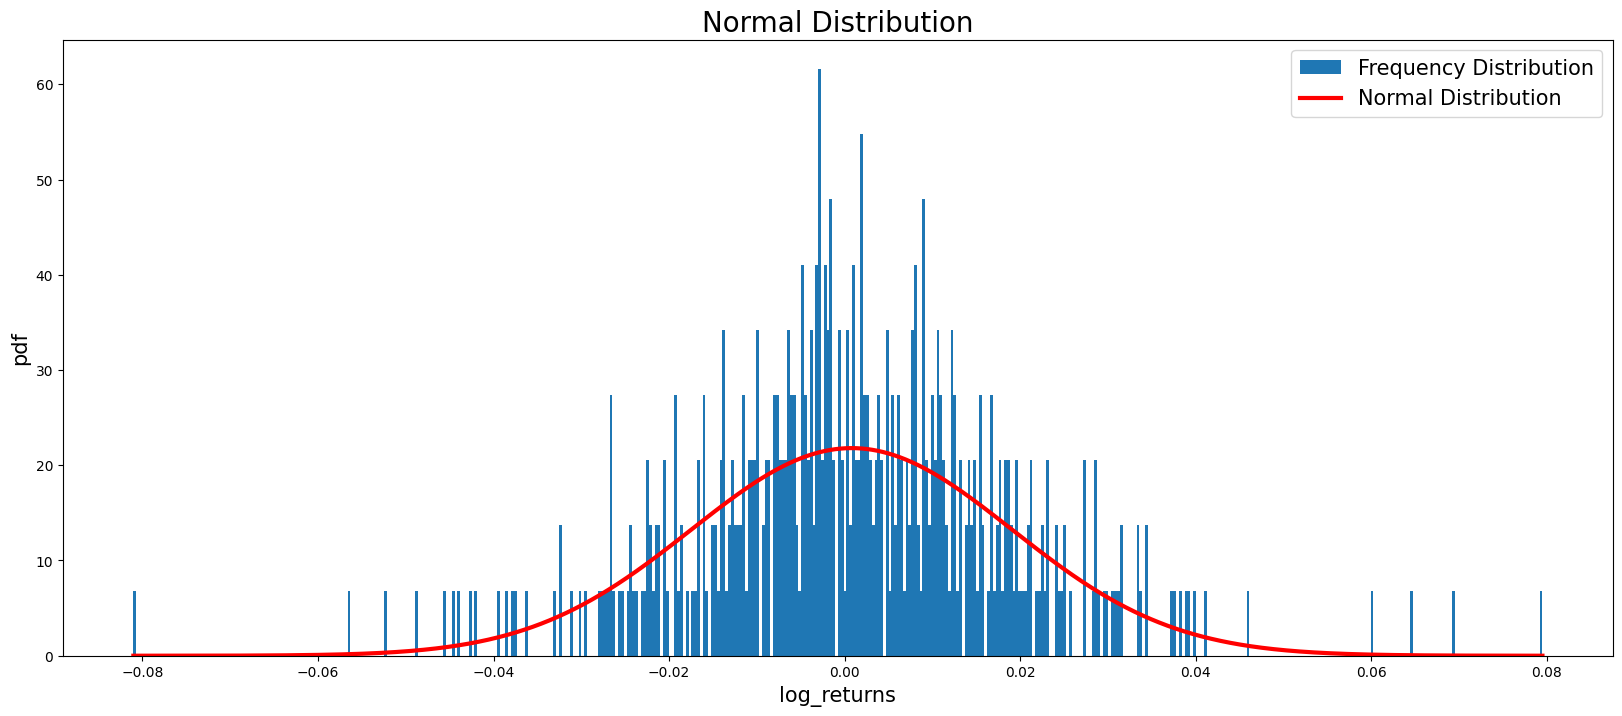

In [13]:
de.distribution_stats("log_returns")
de.annualised_perf("log_returns", 252)
de.plot_histogram("log_returns")

In [14]:
de.data.to_csv("daily_data.csv")

In [15]:
de.resample("W-Fri", agg_method)
de.add_log_diff_column("price")


mean: 0.0042675374867650415 | std: 0.0376515882177432
skew: 0.4635778140982235 | kurtosis: 0.4358798269644155
annualised mean: 0.22191194931178215 | std: 0.030773650456992166


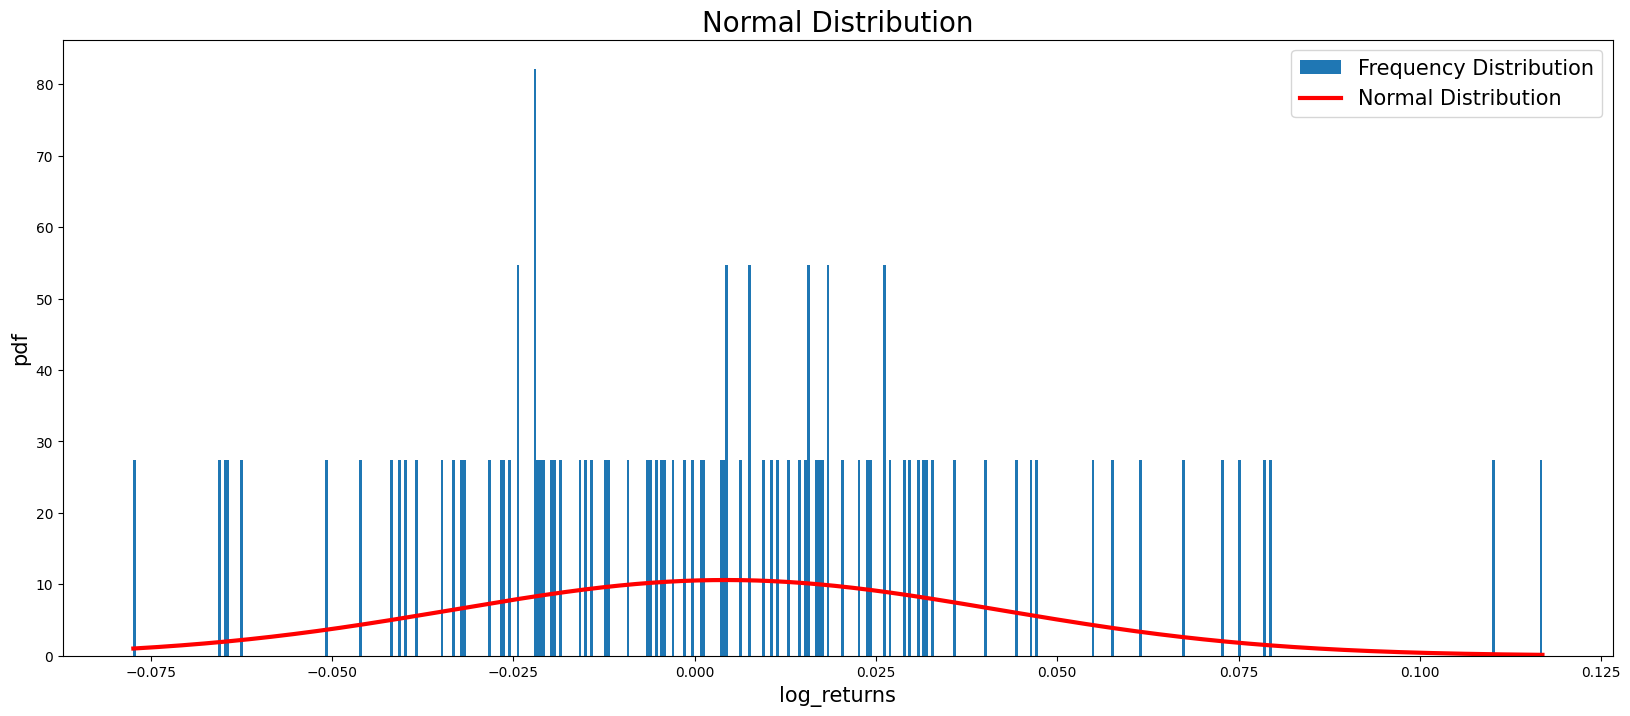

In [16]:
de.distribution_stats("log_returns")
de.annualised_perf("log_returns", 52)
de.plot_histogram("log_returns")

In [17]:
de.data.to_csv("weekly_data.csv")